In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ls /kaggle/input/titanic/

gender_submission.csv  test.csv  train.csv


In [3]:
#import train data.
train=pd.read_csv('/kaggle/input/titanic/train.csv')
train.shape

(891, 12)

In [4]:
#import train and test data.
test=pd.read_csv('/kaggle/input/titanic/test.csv')
test.shape

(418, 11)

In [5]:
#combine the boath data sets in to one
data = train.append(test)
data.shape

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


(1309, 12)

In [6]:
#storing passenger ID of the test data set for make submission file
passenger_Id = test['PassengerId']
passenger_Id.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [7]:
#we need passengerID as index of our 2 data sets so we should remove default index and make our index
train.set_index(['PassengerId'],inplace = True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.set_index(['PassengerId'],inplace = True)
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
#we need to find and deal with null values of each column
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [11]:
#for deal with missing value we need get to know about data types we have in our data sets
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [12]:
test.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

**Cleaning the Data**

In [13]:
#for visualize missing values
import missingno as mn

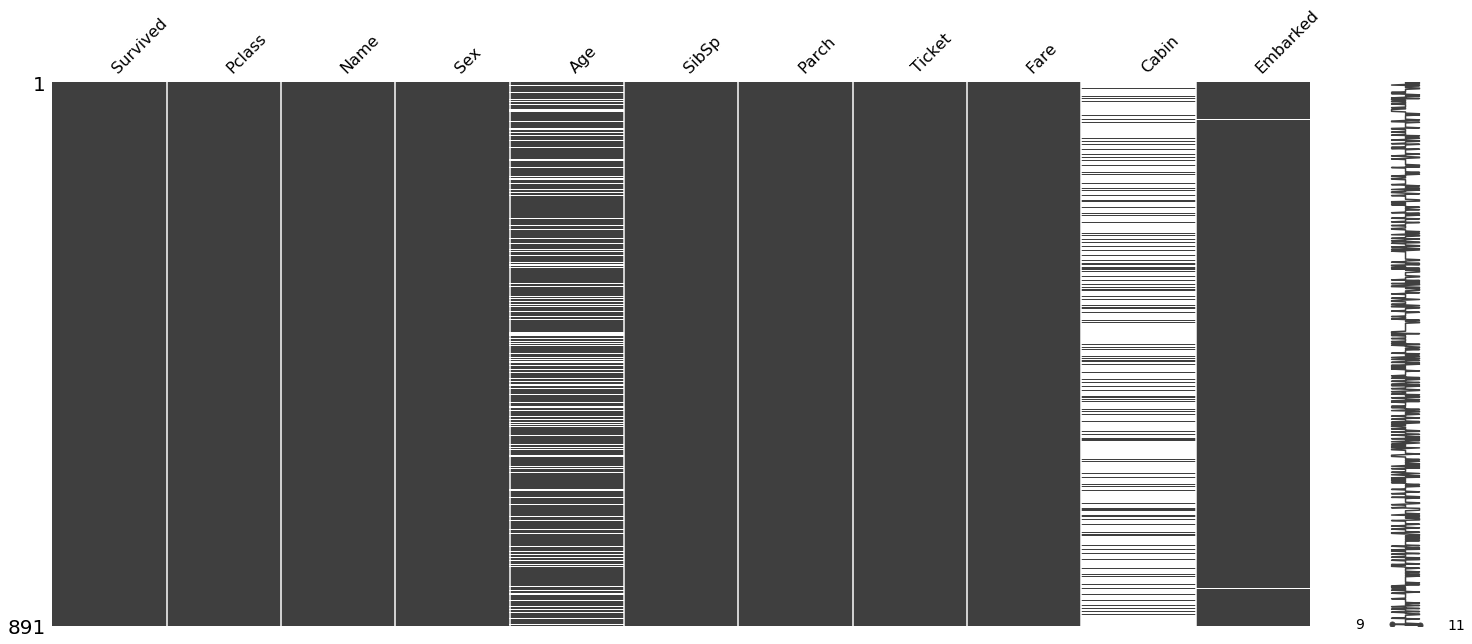

In [14]:
mn.matrix(train)

In [15]:
#replacing the missing values
from sklearn.preprocessing import Imputer

In [16]:
imp = Imputer(missing_values = 'NaN', strategy = 'median', axis = 1)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
#Cleaning the age column
cleaned_age = imp.fit_transform(train['Age'].values.reshape(1,-1))
cleaned_age

array([[22.  , 38.  , 26.  , 35.  , 35.  , 28.  , 54.  ,  2.  , 27.  ,
        14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 28.  ,
        31.  , 28.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 28.  ,
        19.  , 28.  , 28.  , 40.  , 28.  , 28.  , 66.  , 28.  , 42.  ,
        28.  , 21.  , 18.  , 14.  , 40.  , 27.  , 28.  ,  3.  , 19.  ,
        28.  , 28.  , 28.  , 28.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
        65.  , 28.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
         4.  , 28.  , 28.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
        21.  , 26.  , 32.  , 25.  , 28.  , 28.  ,  0.83, 30.  , 22.  ,
        29.  , 28.  , 28.  , 17.  , 33.  , 16.  , 28.  , 23.  , 24.  ,
        29.  , 20.  , 46.  , 26.  , 59.  , 28.  , 71.  , 23.  , 34.  ,
        34.  , 28.  , 28.  , 21.  , 33.  , 37.  , 28.  , 21.  , 28.  ,
        38.  , 28.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
        29.  , 24.  ,  2.  , 21.  , 28.  , 32.5 , 32.5 , 54.  , 12.  ,
      

In [18]:
# Make cleaned_age array to column
cleaned_age = cleaned_age.T
cleaned_age

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [28.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [28.  ],
       [31.  ],
       [28.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [28.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [40.  ],
       [28.  ],
       [28.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [28.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [28.  ],
       [ 3.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [28.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [19]:
#replace the column
train['Age'] = cleaned_age

In [20]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [21]:
#do the same for test data set
cleaned_age_test = imp.fit_transform(test['Age'].values.reshape(1,-1))
cleaned_age_test = cleaned_age_test.T
test['Age'] = cleaned_age_test

**Embarked column cleanup**

In [22]:
#get how many different values in column
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
# we are going to replace nullvalues with most frequent value 'S'
train.Embarked.fillna('S', inplace = True)

In [24]:
train.isnull().sum()
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [25]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [26]:
#Filling the fare column
test.fillna(test.Fare.mean(), inplace = True)

In [27]:
#test data is prepared 
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [28]:
#cabin column has above 80% of null values so we need to drop it.
train.drop(['Cabin'],axis = 1, inplace = True)
test.drop(['Cabin'],axis = 1, inplace = True)

In [29]:
#Now both datasets are null free
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [30]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [31]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
# we have to change sex column in to integer, male = 1 and female = 0
train['Sex'] = train.Sex.apply(lambda x:0 if x == 'female' else 1)

In [33]:
train.Sex

PassengerId
1      1
2      0
3      0
4      0
5      1
      ..
887    1
888    0
889    0
890    1
891    1
Name: Sex, Length: 891, dtype: int64

In [34]:
# do same for test 
test['Sex'] = test.Sex.apply(lambda x:0 if x == 'female' else 1)

In [35]:
test.Sex

PassengerId
892     1
893     0
894     1
895     1
896     0
       ..
1305    1
1306    0
1307    1
1308    1
1309    1
Name: Sex, Length: 418, dtype: int64

**> Removing The Outliers**

In [36]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

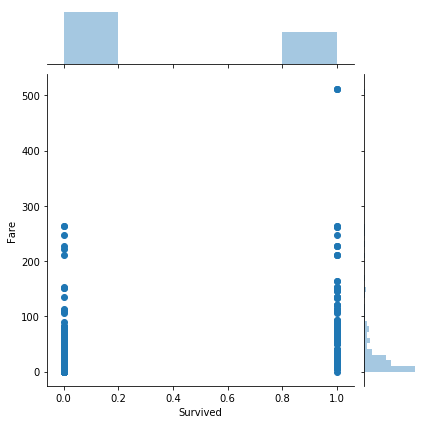

In [37]:
#detect the outliers
sns.jointplot(x= 'Survived' , y = 'Fare' , data = train)

In [38]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [39]:
#remove the outlier above the 400
indexNames = train[ (train['Fare'] >= 400) ].index #get indexes of rows that needs to be deleted
indexNames
train.drop(indexNames , inplace=True)

In [40]:

train.Fare.describe()

count    888.000000
mean      30.582164
std       41.176366
min        0.000000
25%        7.895800
50%       14.454200
75%       30.771850
max      263.000000
Name: Fare, dtype: float64

**Data Analysis**

In [41]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,0.381757,2.313063,0.647523,29.341408,0.524775,0.381757,30.582164
std,0.486091,0.834007,0.478011,13.037026,1.104186,0.806949,41.176366
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,30.771850
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000


In [42]:
#Survived column to others relation
train.groupby('Survived').mean()

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.028233,0.553734,0.329690,22.117887
1,1.958702,0.315634,28.229115,0.477876,0.466077,44.289799


In [43]:
#Sex column to others relation
train.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
0,0.741214,2.162939,27.907348,0.696486,0.651757,42.985091
1,0.186087,2.394783,30.122035,0.431304,0.234783,23.830658


74% females and 18% males survived

In [44]:
#corelation matrix for see each variables relation with other
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.334068,-0.545899,-0.067081,-0.033395,0.082157,0.261742
Pclass,-0.334068,1.000000,0.132881,-0.338998,0.080937,0.018212,-0.604960
Sex,-0.545899,0.132881,1.000000,0.081203,-0.114799,-0.247003,-0.222361
Age,-0.067081,-0.338998,0.081203,1.000000,-0.232732,-0.172623,0.098801
SibSp,-0.033395,0.080937,-0.114799,-0.232732,1.000000,0.415141,0.211816
Parch,0.082157,0.018212,-0.247003,-0.172623,0.415141,1.000000,0.263910
Fare,0.261742,-0.604960,-0.222361,0.098801,0.211816,0.263910,1.000000


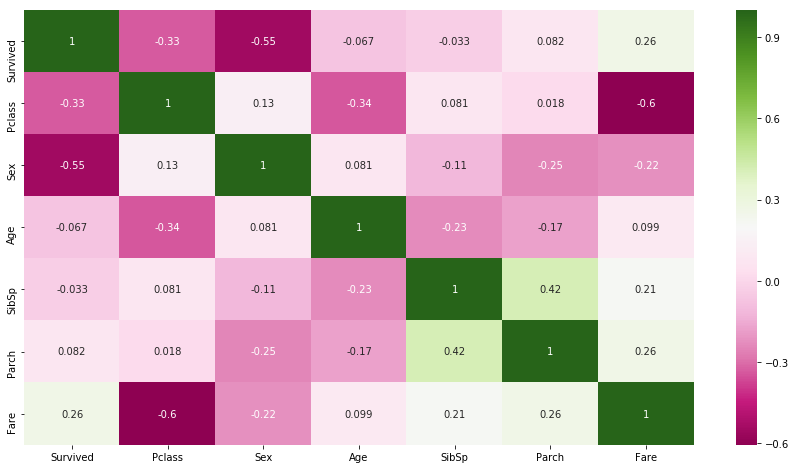

In [45]:
#heatmap for correlation
plt.subplots(figsize = (15,8))
sns.heatmap(train.corr(), annot = True, cmap = 'PiYG')

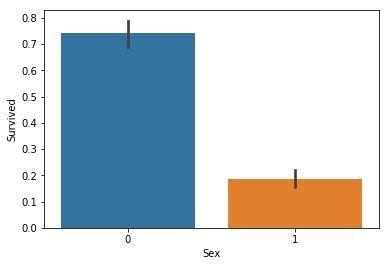

In [46]:
#sex and survived
sns.barplot(x = 'Sex' , y = 'Survived', data = train)

Survived and sex has a strong relation

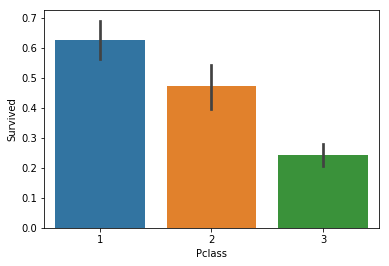

In [47]:
#sex and survived
sns.barplot(x = 'Pclass' , y = 'Survived', data = train)

![](http://)pclass 1 has the most survived rate.

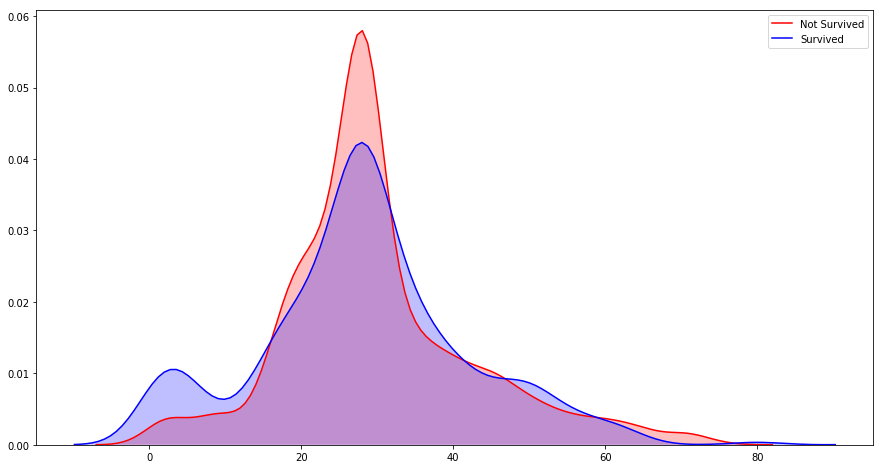

In [48]:
#Age and the survived relationship
plt.subplots(figsize = (15,8))
sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'], color = 'r', shade = True, Label = 'Not Survived')
sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'], color = 'b', shade = True, Label = 'Survived')

**Feature Engineering**

In [49]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


> **Family Feature**

In [50]:
#creating family size feature from
#Parch
#SibSp
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1 #1 is for those wo dont have sibsp or parch, that means his family count is 1


In [51]:
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1 #1 is for those wo dont have sibsp or parch, that means his family count is 1


In [52]:
train.Family_Size.value_counts()
test.Family_Size.value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: Family_Size, dtype: int64

In [53]:
#categorize family size in to 3 categories
def family_group(size):
    a = ''
    if (size <= 1):
        a = 'alone'
    elif (size < 4):
        a = 'small'
    else:
        a = 'large'
    return a

train['FamilyGroup'] = train.Family_Size.map(family_group)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,FamilyGroup
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,2,small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,2,small
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,1,alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,2,small
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,1,alone


In [54]:
#do the same for test data
test['FamilyGroup'] = test.Family_Size.map(family_group)
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,FamilyGroup
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,1,alone
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S,2,small
894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q,1,alone
895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S,1,alone
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S,3,small


> **Age Feature**

In [55]:
#categorize the age in to categories

def age_group(age): #function to catagories the age
    a = ''
    if (age <= 1):
        a = 'infant'
    elif (age <= 4):
        a = 'toddler'
    elif (age <= 12):
        a = 'child'
    elif (age <= 19):
        a = 'teenager'
    elif (age <= 25):
        a = 'young_adult'
    elif (age <= 40):
        a = 'adult'
    elif (age <= 55):
        a = 'middle_age'
    else:
        a = 'seniors'
    return a
train['AgeGroup'] = train.Age.map(age_group)
train.AgeGroup.value_counts()

adult          437
young_adult    137
middle_age     110
teenager        95
seniors         40
child           29
toddler         26
infant          14
Name: AgeGroup, dtype: int64

In [56]:
#do the same for test data 
test['AgeGroup'] = test.Age.map(age_group)
test.AgeGroup.value_counts()

adult          199
young_adult     81
middle_age      58
teenager        36
seniors         19
child           14
infant           8
toddler          3
Name: AgeGroup, dtype: int64

In [57]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,FamilyGroup,AgeGroup
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,2,small,young_adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,2,small,adult
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,1,alone,adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,2,small,adult
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,1,alone,adult


In [58]:
test.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,FamilyGroup,AgeGroup
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,1,alone,adult
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S,2,small,middle_age
894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q,1,alone,seniors
895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S,1,alone,adult
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S,3,small,young_adult
897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,S,1,alone,teenager
898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,Q,1,alone,adult
899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,S,3,small,adult
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,C,1,alone,teenager


> **Fare Feature**

In [59]:
#fare is recorded for family, we make persons fare by deviding fare by family size
train['FarePerPerson'] = train['Fare'] / train['Family_Size']
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,FamilyGroup,AgeGroup,FarePerPerson
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,2,small,young_adult,3.62500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,2,small,adult,35.64165
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,1,alone,adult,7.92500
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,2,small,adult,26.55000
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,1,alone,adult,8.05000


In [60]:
#do the same for test data
test['FarePerPerson'] = test['Fare'] / test['Family_Size']
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,FamilyGroup,AgeGroup,FarePerPerson
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,1,alone,adult,7.829200
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S,2,small,middle_age,3.500000
894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q,1,alone,seniors,9.687500
895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S,1,alone,adult,8.662500
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S,3,small,young_adult,4.095833


In [61]:
#categorise the fare of a person
def fare_group(fare): #function to catagories the fare
    a = ''
    if (fare <= 10):
        a = 'very_low'
    elif (fare <= 20):
        a = 'low'
    elif (fare <= 50):
        a = 'mid'
    elif (fare <= 100):
        a = 'high'
    else:
        a = 'very_high'
    return a
train['FareGroup'] = train.FarePerPerson.map(fare_group)
train.FareGroup.value_counts()

very_low     512
mid          160
low          153
high          44
very_high     19
Name: FareGroup, dtype: int64

In [62]:
#do the same for test data 
test['FareGroup'] = test.FarePerPerson.map(fare_group)
test.FareGroup.value_counts()

very_low     229
mid           77
low           75
high          22
very_high     15
Name: FareGroup, dtype: int64

In [63]:
#Creating dummy variables
train = pd.get_dummies(train , columns = ['Embarked','FamilyGroup','AgeGroup','FareGroup'], drop_first = True)

In [88]:
#for test data
test = pd.get_dummies(test , columns = ['Embarked','FamilyGroup','AgeGroup','FareGroup'], drop_first = True)

In [89]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Family_Size,FarePerPerson,...,AgeGroup_infant,AgeGroup_middle_age,AgeGroup_seniors,AgeGroup_teenager,AgeGroup_toddler,AgeGroup_young_adult,FareGroup_low,FareGroup_mid,FareGroup_very_high,FareGroup_very_low
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1,7.829200,...,0,0,0,0,0,0,0,0,0,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2,3.500000,...,0,1,0,0,0,0,0,0,0,1
894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1,9.687500,...,0,0,1,0,0,0,0,0,0,1
895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,1,8.662500,...,0,0,0,0,0,0,0,0,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,3,4.095833,...,0,0,0,0,0,1,0,0,0,1


In [64]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Family_Size,...,AgeGroup_infant,AgeGroup_middle_age,AgeGroup_seniors,AgeGroup_teenager,AgeGroup_toddler,AgeGroup_young_adult,FareGroup_low,FareGroup_mid,FareGroup_very_high,FareGroup_very_low
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,...,0,0,0,0,0,1,0,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,...,0,0,0,0,0,0,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,...,0,0,0,0,0,0,0,1,0,0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1,...,0,0,0,0,0,0,0,0,0,1


In [65]:
#dropping unwanted columns
train.drop(['Name','Ticket','Fare','Age','Family_Size','FarePerPerson'], axis = 1, inplace = True)

In [90]:
#do the same for test
test.drop(['Name','Ticket','Fare','Age','Family_Size','FarePerPerson'], axis = 1, inplace = True)

In [91]:
test.head()

,Pclass,Sex,SibSp,Parch,Embarked_Q,Embarked_S,FamilyGroup_large,FamilyGroup_small,AgeGroup_child,AgeGroup_infant,AgeGroup_middle_age,AgeGroup_seniors,AgeGroup_teenager,AgeGroup_toddler,AgeGroup_young_adult,FareGroup_low,FareGroup_mid,FareGroup_very_high,FareGroup_very_low
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
893,3,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
894,2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
895,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
896,3,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1


In [66]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked_Q,Embarked_S,FamilyGroup_large,FamilyGroup_small,AgeGroup_child,AgeGroup_infant,AgeGroup_middle_age,AgeGroup_seniors,AgeGroup_teenager,AgeGroup_toddler,AgeGroup_young_adult,FareGroup_low,FareGroup_mid,FareGroup_very_high,FareGroup_very_low
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


**Select the Model**

In [95]:
#for traning has to separate features and the prediction(lable)
X=train.drop('Survived',axis=1)
y=train['Survived'].astype(int)
X.shape

(888, 19)

In [102]:
test.head()

,Pclass,Sex,SibSp,Parch,Embarked_Q,Embarked_S,FamilyGroup_large,FamilyGroup_small,AgeGroup_child,AgeGroup_infant,AgeGroup_middle_age,AgeGroup_seniors,AgeGroup_teenager,AgeGroup_toddler,AgeGroup_young_adult,FareGroup_low,FareGroup_mid,FareGroup_very_high,FareGroup_very_low
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
893,3,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
894,2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
895,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
896,3,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1


**check accuracy of multiple algorithms to select best **


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 
from xgboost import XGBClassifier


classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    XGBClassifier(),
    RandomForestClassifier(n_estimators=100, max_features=3),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]
    


log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
acc_dict = {}

for train_index, test_index in sss.split(X, y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
    
        clf.fit(X_train,y_train)
        predict=clf.predict(X_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Text(0.5, 1.0, 'Classifier Accuracy')

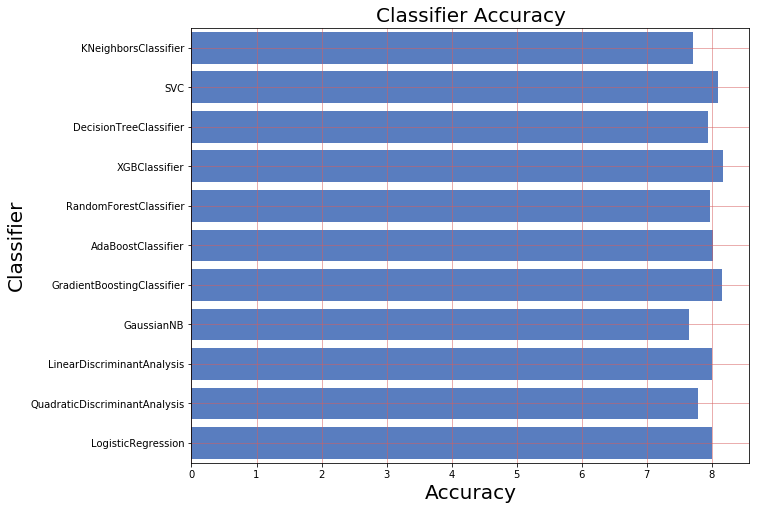

In [73]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
log.set_index([[0,1,2,3,4,5,6,7,8,9,10]])
%matplotlib inline
sns.set_color_codes("muted")
ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=20)

<h>**Use XGB Classifire**</h>

In [85]:
#setting up the classifire
xgb = XGBClassifier(max_depth=10,
                    learning_rate=0.009,
                    n_estimators=1000,
                    nthread =-1,
                    subsample=1,
                    colsample_bytree=0.8
                   )

#fit the model
xgb.fit(X_train,y_train)

#predict the survival
predict=xgb.predict(X_test)

#display scores
print(accuracy_score(y_test, predict))
print(confusion_matrix(y_test, predict))
print(precision_score(y_test, predict))
print(recall_score(y_test, predict))


0.8014981273408239
[[145  20]
 [ 33  69]]
0.7752808988764045
0.6764705882352942


**Predict the submission file (test data file)**

In [96]:
Result=xgb.predict(test)
print(Result)
print(len(Result))

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]
418


In [104]:
#saving the csv file for submission
temp = test

In [106]:
temp['Survived'] = Result.T

In [122]:
temp['Survived'].to_csv('mysubmission.csv', index = True, header = True)

In [117]:
ls /kaggle/input/titanic/

gender_submission.csv  test.csv  train.csv


In [123]:
mysubmission=pd.read_csv('mysubmission.csv')

In [135]:
from IPython.display import HTML
def create_download_link(title = "Download CSV file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

create_download_link(filename='mysubmission.csv')